In [1]:
import numpy as np

### Уровень 0

In [2]:
matrix = np.array([[-1,0],[0,1]]) #Диагональная, ортогональная, не единичная матрица
np.dot(matrix, matrix.T) 

array([[1, 0],
       [0, 1]])

In [3]:
matrix = np.array([[1,0],[0,1]]) #Единичная матрица является одновременно ортогональной, верхне- и нижнетреугольной
matrix @ matrix.T 

array([[1, 0],
       [0, 1]])

In [4]:
matrix = np.array([[3, 2],[4, 3]]) #Матрица, у которой определитель = 1, и все элементы не равны 0
np.linalg.det(matrix)

1.0

In [5]:
m = np.array([[2, 2],
              [1, 3]])
np.linalg.eig(m) #собственные числа и собственные векторы матрицы m

(array([1., 4.]),
 array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

### Уровень 1

In [6]:
m = np.array([[1,2],
              [2,3]])

In [7]:
sV, S = np.linalg.eig(m) #
print(sV, S) 

[-0.23606798  4.23606798] [[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]


In [8]:
D = np.diag(sV) #Диагональная матрица, на диагонали расположены собственные значения матрицы m
D

array([[-0.23606798,  0.        ],
       [ 0.        ,  4.23606798]])

In [9]:
St = S.T #Матрица, обратная матрцице с собственными векторами матрицы m
St

array([[-0.85065081,  0.52573111],
       [-0.52573111, -0.85065081]])

In [10]:
np.dot(np.dot(S,D),St) #Проверяем верно ли спектральное разложение

array([[1., 2.],
       [2., 3.]])

In [19]:
from sklearn.datasets import load_digits
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [124]:
digits = load_digits()
X = digits.data
y = digits.target


MAE = ([])

for i in range(2,65):
    pca = PCA(n_components=i)
    X_reduced = pca.fit_transform(X)

    restored_data = pca.inverse_transform(X_reduced)
    
    MAE.append(mean_squared_error(X, restored_data))

Text(0.5, 1.0, 'Зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA')

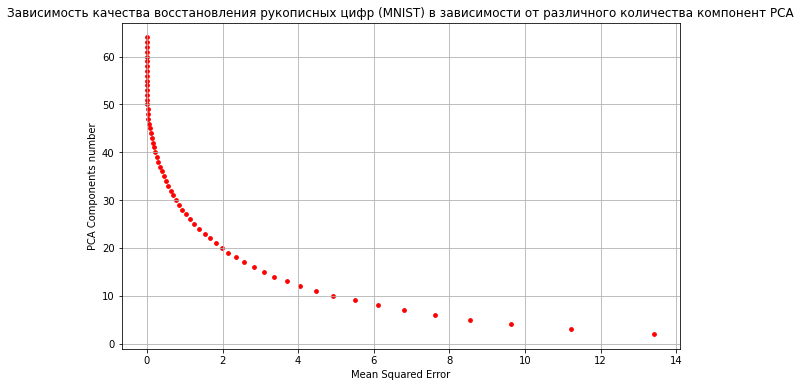

In [127]:
plt.figure(figsize = (10,6))
plt.grid()
plt.scatter(MAE, range(2,65), s = 14, c='r')
plt.xlabel('Mean Squared Error')
plt.ylabel('PCA Components number')
plt.title('Зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA')